<a href="https://colab.research.google.com/github/joshuadollison/MAT421/blob/main/MAT421_16133_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 4**
Joshua Dollison

MAT421-16133

2/9/2025


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# **19.1: Root Finding Problem Statement**

The course text states that the root or zero of a function, $f(x)$, is an $x_r$ such that $f(x_r) = 0$.  Some simple functions have explicit solutions (e.g., quadratic equations), but determining an analytic, or exact, solution for the roots of functions can be difficult. For these cases, it is useful to generate numerical approximations.

The example below first plots the function $ f(x) = x^3 - 6x^2 + 11x - 6 $.  The function has three known roots at $x = 1, 2, 3$, where $f(x) = 0$.  The plot includes a horizontal line at $y=0$ to visually show where the function crosses the x-axis.

Next we use the `fsolve` function from `scipy.optimize` to numerically approximate the roots.  Initial guesses are given close to the expected roots $x = 1, 2, 3$.  The function returns computed values for the roots, verifying the correctness of numerical methods.

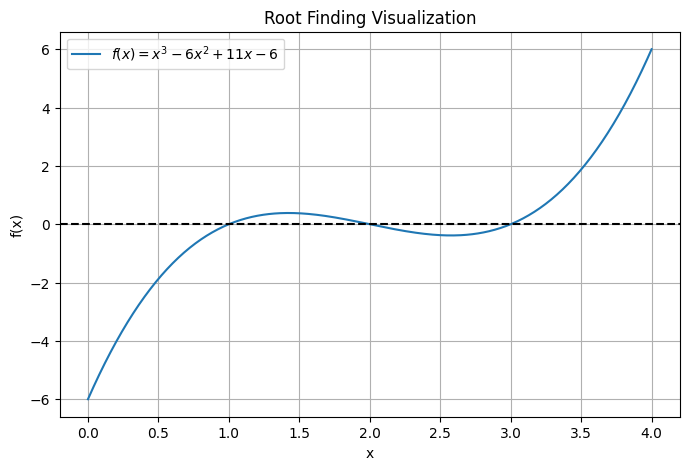

Numerically computed roots: [1. 2. 3.]


In [2]:
# define func
def f(x):
    return x**3 - 6*x**2 + 11*x - 6  # Roots at x = 1, 2, 3

# plot func
x_vals = np.linspace(0, 4, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label='$f(x) = x^3 - 6x^2 + 11x - 6$')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Root Finding Visualization')
plt.legend()
plt.grid()
plt.show()

# find roots
roots = fsolve(f, [1.3, 2.2, 4])  # Initial guesses near expected roots
print("Numerically computed roots:", roots)


# **19.2: Tolerance**


The course text states that in engineering and science, error is a deviation from an expected or computed value. Tolerance is the level of error
that is acceptable for an engineering application. We say that a computer program has converged to a solution when it has found a solution with an error smaller than the tolerance. When computing roots numerically, or conducting any other kind of numerical analysis, it is important to establish both a metric for error and a tolerance that is suitable for a given engineering/science application.

The text goes on to state that for computing roots, we want an $x_r$ such that $f(x_r)$ is very close to 0.  As we're looking for an error close to zero when finding roots, $|f(x)|$ and, in some cases, $|x_{i+1} - x_i|$ provide suitable estimations of error ($e$).

The example below checks how close an approximate root is to the actual root $ \sqrt{2} $. The function compares an estimated value (e.g., $1.41$) to the actual root and calculates the absolute error. If the error is less than the defined tolerance ($10^{-3}$), the approximation is considered acceptable.

Then we visualize how tolerance affects root approximation.  The function $ f(x) = x^2 - 2 $ is plotted in the range $ x \in [1.3, 1.5] $.  A vertical red dashed line is drawn at $ x = \sqrt{2} $ to indicate the actual root.  This plot helps illustrate how small variations in $ x $ can impact the function value and why tolerance is important.

$$
\text{Error} = | x_{\text{approx}} - x_{\text{actual}} |
$$

If the error falls below a specified tolerance, the approximation is deemed sufficient.

Approximate root: 1.41, Actual root: 1.4142135623730951, Error: 0.004213562373095225
False


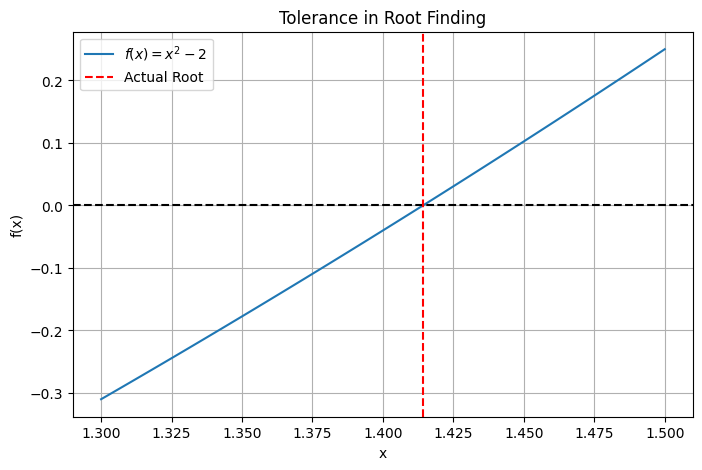

In [3]:
def root_approximation(x, tol=1e-3):
    actual_root = np.sqrt(2)
    error = abs(x - actual_root)
    print(f"Approximate root: {x}, Actual root: {actual_root}, Error: {error}")
    return error < tol

print(root_approximation(1.41))

x_vals = np.linspace(1.3, 1.5, 100)
y_vals = x_vals**2 - 2

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label='$f(x) = x^2 - 2$')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(x=np.sqrt(2), color='red', linestyle='--', label='Actual Root')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Tolerance in Root Finding')
plt.legend()
plt.grid()
plt.show()

# **19.3: Bisection Method**

The Bisection Method is a numerical root-finding technique that iteratively narrows the interval [a, b] where `f(x)` changes sign. According to the course text, the bisection method uses the intermediate value theorem iteratively to find roots.

Let $f(x)$ be a continuous function, and $a$ and $b$ be real scalar values such that $a < b$. Assume, without loss of generality, that $f(a) > 0$ and $f(b) < 0$. Then by the intermediate value theorem, there must be a root on the open interval $(a, b)$.

Now let $m = \frac{a + b}{2}$, the midpoint between $a$ and $b$. If $f(m) = 0$ or is close enough, then $m$ is a root. If $f(m) > 0$, then $m$ is an improvement on the left bound, $a$, and there is guaranteed to be a root on the open interval $(m, b)$. If $f(m) < 0$, then $m$ is an improvement on the right bound, $b$, and there is guaranteed to be a root on the open interval $(a, m)$.

In the example below the Bisection Method from the class text is implemented to find the root of $f(x) = x^2 - 2$.  The function must have opposite signs at $a$ and $b$ to ensure a root exists in the interval. The method iteratively halves the interval until the root is found within a specified tolerance.

Then, a visualization of the Bisection Method is provided.  The midpoint of the interval is plotted in red at each iteration.  This demonstrates how the method systematically narrows down the root.

Bisection Method Root: 1.4142136573791504


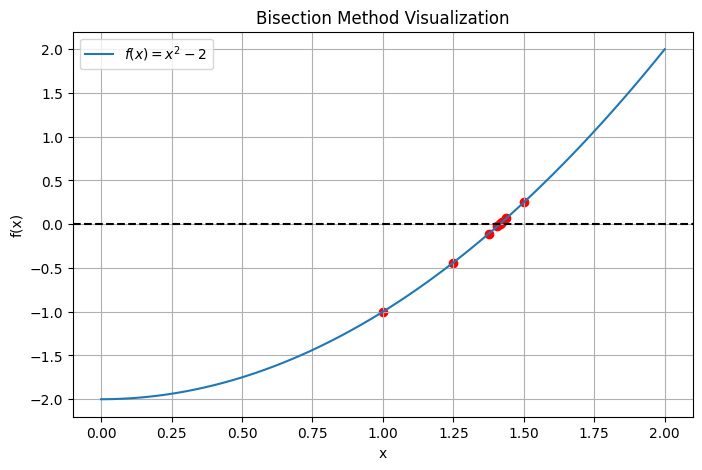

In [4]:
def my_bisection(f, a, b, tol):
  # approximates a root, R, of f bounded
  # by a and b to within tolerance
  # | f(m) | < tol with m the midpoint
  # between a and b Recursive implementation
  # check if a and b bound a root
  if np.sign(f(a)) == np.sign(f(b)):
    raise Exception("The scalars a and b do not bound a root")

  # get midpoint
  m = (a + b)/2

  if np.abs(f(m)) < tol:
    # stopping condition, report m as root
    return m
  elif np.sign(f(a)) == np.sign(f(m)):
    # case where m is an improvement on a.
    # Make recursive call with a = m
    return my_bisection(f, m, b, tol)
  elif np.sign(f(b)) == np.sign(f(m)):
    # case where m is an improvement on b.
    # Make recursive call with b = m
    return my_bisection(f, a, m, tol)


root_bisection = my_bisection(lambda x: x**2 - 2, 0, 2, tol=1e-6)
print("Bisection Method Root:", root_bisection)


def plot_bisection(f, a, b, iterations=10):
    x_vals = np.linspace(a, b, 100)
    plt.figure(figsize=(8, 5))
    plt.plot(x_vals, f(x_vals), label='$f(x) = x^2 - 2$')
    plt.axhline(0, color='black', linestyle='--')
    for _ in range(iterations):
        mid = (a + b) / 2
        plt.scatter(mid, f(mid), color='red')
        if f(mid) * f(a) < 0:
            b = mid
        else:
            a = mid
    plt.title('Bisection Method Visualization')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid()
    plt.show()

plot_bisection(lambda x: x**2 - 2, 0, 2)

# **19.4: Newton-Raphson Method**

The Newton-Raphson Method is an iterative root-finding algorithm using function derivatives for rapid convergence.  The course text states that Written generally, a Newton step computes an improved guess, $x_i$, using a previous guess $x_{i-1}$, and is given by the equation:

$$
x_i = x_{i-1} - \frac{g(x_{i-1})}{g'(x_{i-1})}.
$$

The Newton-Raphson Method of finding roots iterates Newton steps from $x_0$ until the error is less than the tolerance.

In the example below, the Newton-Raphson method that was provided in the class text is used to approximate the root of $f(x) = x^2 - 2$.  The function's derivative $f'(x) = 2x$ is required for iterative updates.  The method starts with an initial guess and refines the approximation iteratively.

Finally, a plot shows how the Newton-Raphson method updates the estimate in each iteration.  The initial guess is marked, and successive approximations are plotted in red.  The visualization helps illustrate how quickly the method converges.

Newton-Raphson Root: 1.4142135623746899


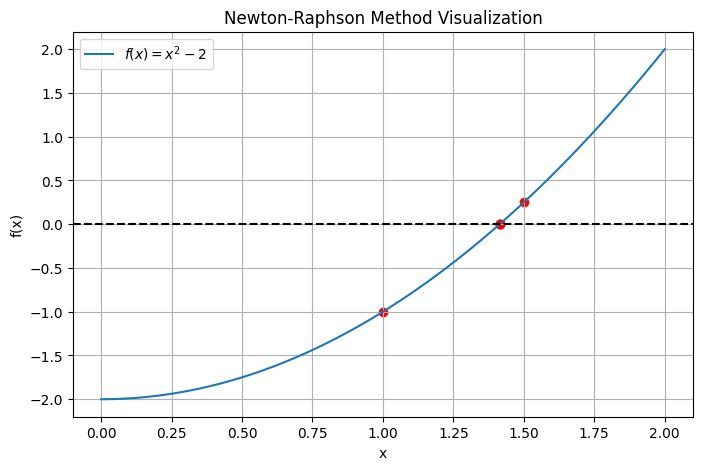

In [5]:
def my_newton(f, df, x0, tol):
  # output is an estimation of the root of f
  # using the Newton Raphson method
  # recursive implementation
  if abs(f(x0)) < tol:
    return x0
  else:
    return my_newton(f, df, x0 - f(x0)/df(x0), tol)

root_newton = my_newton(lambda x: x**2 - 2, lambda x: 2*x, 1, tol=1e-6)
print("Newton-Raphson Root:", root_newton)

def plot_newton(f, df, x0, iterations=5):
    x_vals = np.linspace(0, 2, 100)
    plt.figure(figsize=(8, 5))
    plt.plot(x_vals, f(x_vals), label='$f(x) = x^2 - 2$')
    plt.axhline(0, color='black', linestyle='--')
    for _ in range(iterations):
        plt.scatter(x0, f(x0), color='red')
        x0 = x0 - f(x0) / df(x0)
    plt.title('Newton-Raphson Method Visualization')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid()
    plt.show()

plot_newton(lambda x: x**2 - 2, lambda x: 2*x, 1)